                            DATA SCIENTIST'S ROLE
                            
               TSERPES MARIOS - ASSIGNMENT_2 - PYTHON_COURSE

In [2]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style = "whitegrid")

In [3]:
#Reading dataset
df = pd.read_csv('kaggle_survey_2020_responses.csv',  usecols=[1, 2, 3, 4, 5, 6, 118], low_memory=False)

In [4]:
#Checking dimensions of dataset(7 columns, 20037 obs)
print(df.shape)
df.head(3)

(20037, 7)


,Q1,Q2,Q3,Q4,Q5,Q6,Q24
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What is your current yearly compensation (appr...
1,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,NaN
2,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,"100,000-124,999"


In [5]:
#But our analysis will focus on a particular role
print(df['Q5'].unique())

['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'
 'Student' 'Data Engineer' 'Software Engineer' 'Data Scientist'
 'Data Analyst' 'Research Scientist' 'Other' 'Currently not employed'
 'Statistician' 'Product/Project Manager' 'Machine Learning Engineer' nan
 'Business Analyst' 'DBA/Database Engineer']


                               DATA SCIENTIST

In [6]:
#Creating a new subset based on Data Scientist role
dsc_df = df[df['Q5'] == 'Data Scientist'].reset_index(drop=True)
print(dsc_df.shape)
dsc_df.head(5)

(2676, 7)


,Q1,Q2,Q3,Q4,Q5,Q6,Q24
0,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,"125,000-149,999"
1,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,"70,000-79,999"
2,30-34,Man,Russia,Bachelor’s degree,Data Scientist,< 1 years,$0-999
3,22-24,Man,Indonesia,Master’s degree,Data Scientist,3-5 years,"4,000-4,999"
4,18-21,Man,India,Bachelor’s degree,Data Scientist,3-5 years,"> $500,000"


                        DATA CLEANING AND DATA PREPARATION

In [7]:
#Creating a simple function in order to explore NaN values
def number_nan(subset):
    for column in dsc_df: 
        print(f"The column {column} has {dsc_df[column].isnull().sum()} NaN values" )

In [8]:
#Calling defined function for NaN Values in subset
number_nan(df)

The column Q1 has 0 NaN values
The column Q2 has 0 NaN values
The column Q3 has 0 NaN values
The column Q4 has 0 NaN values
The column Q5 has 0 NaN values
The column Q6 has 17 NaN values
The column Q24 has 278 NaN values


In [9]:
#Removing NaN values and reindexing
dsc_df = dsc_df.dropna().reset_index(drop=True)

In [10]:
#Checking again the number of NaN values
number_nan(df)

The column Q1 has 0 NaN values
The column Q2 has 0 NaN values
The column Q3 has 0 NaN values
The column Q4 has 0 NaN values
The column Q5 has 0 NaN values
The column Q6 has 0 NaN values
The column Q24 has 0 NaN values


                             DATA TRANSFORMATION

In [11]:
dsc_df.columns #Looking the names of columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q24'], dtype='object')

In [12]:
#Creating a list with new names
list_of_new_column_names = ['age', 'sex', 'country', 'education', 'role', 'prog_exp', 'annual_salary']
list_of_new_column_names

['age', 'sex', 'country', 'education', 'role', 'prog_exp', 'annual_salary']

In [13]:
#Creating a dictionary initial names of columns and list of new names
dict_with_new_names = dict(zip(list(dsc_df.columns), list_of_new_column_names))
dict_with_new_names

{'Q1': 'age',
 'Q2': 'sex',
 'Q3': 'country',
 'Q4': 'education',
 'Q5': 'role',
 'Q6': 'prog_exp',
 'Q24': 'annual_salary'}

In [14]:
#Renaming columns of subset
dsc_df = dsc_df.rename(columns = dict_with_new_names)
dsc_df.columns

Index(['age', 'sex', 'country', 'education', 'role', 'prog_exp',
       'annual_salary'],
      dtype='object')

                         Regarding the content of the Gender column.

In [15]:
#unique values of sex column
dsc_df['sex'].unique()

array(['Man', 'Woman', 'Nonbinary', 'Prefer to self-describe',
       'Prefer not to say'], dtype=object)

In [16]:
#Rename 'Nonbinary', 'Prefer to self-describe', 'Prefer not to say' to "Other"
dsc_df['sex'] = dsc_df['sex'].replace( {'Man' : 'Man',
                    'Woman' : 'Woman',
                    'Nonbinary' : 'Other',
                    'Prefer to self-describe': 'Other',
                    'Prefer not to say' : 'Other'})

                       Regarding the content of annual salary column

In [17]:
dsc_df['annual_salary'].unique()

array(['125,000-149,999', '70,000-79,999', '$0-999', '4,000-4,999',
       '> $500,000', '60,000-69,999', '40,000-49,999', '80,000-89,999',
       '100,000-124,999', '250,000-299,999', '50,000-59,999',
       '5,000-7,499', '2,000-2,999', '20,000-24,999', '15,000-19,999',
       '25,000-29,999', '10,000-14,999', '200,000-249,999',
       '300,000-500,000', '150,000-199,999', '90,000-99,999',
       '30,000-39,999', '1,000-1,999', '7,500-9,999', '3,000-3,999'],
      dtype=object)

In [18]:
list_of_new_salary = [
    '125000-149999', '70000-79999',
    '0-999', '4000-4999', 
    '500000-999999', '60000-69999',
    '40000-49999', '80000-89999', 
    '100000-124999', '250000-299999', 
    '50000-59999', '5000-7499', 
    '2000-2999', '20000-24999', 
    '15000-19999', '25000-29999', 
    '10000-14999', '200000-249999', 
    '300000-499999', '150000-199999', 
    '90000-99999', '30000-39999', 
    '1000-1999', '7500-9999', '3000-3999'
]

dict_of_new_annual_salary = dict(zip(dsc_df['annual_salary'].unique().tolist(), list_of_new_salary))
dict_of_new_annual_salary   

{'125,000-149,999': '125000-149999',
 '70,000-79,999': '70000-79999',
 '$0-999': '0-999',
 '4,000-4,999': '4000-4999',
 '> $500,000': '500000-999999',
 '60,000-69,999': '60000-69999',
 '40,000-49,999': '40000-49999',
 '80,000-89,999': '80000-89999',
 '100,000-124,999': '100000-124999',
 '250,000-299,999': '250000-299999',
 '50,000-59,999': '50000-59999',
 '5,000-7,499': '5000-7499',
 '2,000-2,999': '2000-2999',
 '20,000-24,999': '20000-24999',
 '15,000-19,999': '15000-19999',
 '25,000-29,999': '25000-29999',
 '10,000-14,999': '10000-14999',
 '200,000-249,999': '200000-249999',
 '300,000-500,000': '300000-499999',
 '150,000-199,999': '150000-199999',
 '90,000-99,999': '90000-99999',
 '30,000-39,999': '30000-39999',
 '1,000-1,999': '1000-1999',
 '7,500-9,999': '7500-9999',
 '3,000-3,999': '3000-3999'}

In [19]:
dsc_df['annual_salary'] = dsc_df['annual_salary'].replace(dict_of_new_annual_salary)
dsc_df.head(2)

,age,sex,country,education,role,prog_exp,annual_salary
0,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,125000-149999
1,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,70000-79999


                     Regarding the content of prog_xp column

In [20]:
dsc_df['prog_exp'].unique()

array(['5-10 years', '< 1 years', '3-5 years', '10-20 years', '1-2 years',
       '20+ years', 'I have never written code'], dtype=object)

In [21]:
#creating a list with new names 
list_of_prog_exp_renames = ['5-10', '<1', '3-5', '10-20', '1-2', '>20', '0']
list_of_prog_exp_renames

['5-10', '<1', '3-5', '10-20', '1-2', '>20', '0']

In [22]:
#Creating a list with initial values
list_of_prog_exp = dsc_df['prog_exp'].unique().tolist()
list_of_prog_exp

['5-10 years',
 '< 1 years',
 '3-5 years',
 '10-20 years',
 '1-2 years',
 '20+ years',
 'I have never written code']

In [23]:
#Creating a dictionary in order to be used in replace() function , below.
dict_of_new_prog_exp_renames = dict(zip(list_of_prog_exp, list_of_prog_exp_renames))
dict_of_new_prog_exp_renames

{'5-10 years': '5-10',
 '< 1 years': '<1',
 '3-5 years': '3-5',
 '10-20 years': '10-20',
 '1-2 years': '1-2',
 '20+ years': '>20',
 'I have never written code': '0'}

In [24]:
#Replacing values of prog_exp column
dsc_df['prog_exp'] = dsc_df['prog_exp'].replace(dict_of_new_prog_exp_renames)
dsc_df.prog_exp.unique()

array(['5-10', '<1', '3-5', '10-20', '1-2', '>20', '0'], dtype=object)

                      Regarding the content of country column

In [25]:
#Dictionary For the values in the column I want to rename
new_names_replacements = {
    'United States of America': 'USA',
    'Iran, Islamic Republic of...': 'Iran',
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'Viet Nam': 'Vietnam',
    "Republic of Korea": "Korea, Republic of",
    "South Korea": "Korea, Republic of"
}

In [26]:
#Replacing
dsc_df['country'] = dsc_df['country'].replace(new_names_replacements)
dsc_df['country'].unique()

array(['USA', 'Germany', 'Russia', 'Indonesia', 'India', 'Ukraine',
       'China', 'Colombia', 'Canada', 'Egypt', 'Nigeria', 'Turkey',
       'Spain', 'Iran', 'Other', 'Romania', 'UK', 'Sweden', 'Netherlands',
       'France', 'Japan', 'South Africa', 'Poland', 'Mexico',
       'Korea, Republic of', 'Argentina', 'Brazil', 'Vietnam', 'Malaysia',
       'Switzerland', 'Australia', 'Bangladesh', 'Italy', 'Morocco',
       'Pakistan', 'Israel', 'Tunisia', 'Kenya', 'Chile', 'Ireland',
       'Belarus', 'Singapore', 'Saudi Arabia', 'Thailand', 'Taiwan',
       'Portugal', 'Belgium', 'Ghana', 'Greece', 'United Arab Emirates',
       'Nepal', 'Philippines', 'Peru', 'Sri Lanka'], dtype=object)

                       Regarding the content of education level column

In [27]:
dsc_df.education.unique()

array(['Master’s degree', 'Doctoral degree', 'Bachelor’s degree',
       'Some college/university study without earning a bachelor’s degree',
       'I prefer not to answer', 'Professional degree',
       'No formal education past high school'], dtype=object)

In [28]:
#I make the assumption that at least is required a BSc degree for Data Scientists role
dsc_df['education'] = dsc_df['education'].replace({'Master’s degree' : 'MSc', 
                          'Doctoral degree' : 'PHD',
                          'Bachelor’s degree' : 'BSc',
                          'Some college/university study without earning a bachelor’s degree' : 'Other',
                          'I prefer not to answer' : 'Other', 
                          'Professional degree' : 'Other', 
                          'No formal education past high school' : 'Other'})

dsc_df['education'].unique()

array(['MSc', 'PHD', 'BSc', 'Other'], dtype=object)

                   Delete rows that do not meet logic.
In this case we have participants less that 24 years with experience greater that 10 years.

In [29]:
#Condition : less of 24 and more than ten yersd of prog_exp
too_young_too_high_exp = (dsc_df[
    (dsc_df['age'] <= '24')
    & ((dsc_df['prog_exp'] == '10-20')
    | (dsc_df['prog_exp'] == '>20'))
])
too_young_too_high_exp

,age,sex,country,education,role,prog_exp,annual_salary
175,18-21,Man,India,MSc,Data Scientist,10-20,0-999
1013,22-24,Man,India,MSc,Data Scientist,>20,0-999
1020,18-21,Man,UK,Other,Data Scientist,>20,30000-39999
1140,22-24,Woman,Japan,Other,Data Scientist,10-20,300000-499999
1676,18-21,Man,Indonesia,Other,Data Scientist,10-20,1000-1999


In [30]:
#dropping these values from our subset
dsc_df = dsc_df.drop(index = [175, 1013, 1020, 1140, 1676])

dsc_df.shape #as we can see we have already drop rows referring to the index

(2393, 7)

In [31]:
#Examining young participants with extremely high annual salary
too_young_too_high_salary = (dsc_df[
    (dsc_df['age'] <= '24')
       & ((dsc_df['annual_salary'] == '250000-299999') 
       | (dsc_df['annual_salary'] == '300000-499999') 
       | (dsc_df['annual_salary'] == '500000-999999'))
])

too_young_too_high_salary

,age,sex,country,education,role,prog_exp,annual_salary
4,18-21,Man,India,BSc,Data Scientist,3-5,500000-999999
38,22-24,Man,India,BSc,Data Scientist,1-2,500000-999999
60,18-21,Man,India,BSc,Data Scientist,<1,300000-499999
257,18-21,Man,USA,BSc,Data Scientist,5-10,300000-499999
414,18-21,Woman,USA,MSc,Data Scientist,3-5,250000-299999
1241,22-24,Man,India,BSc,Data Scientist,3-5,500000-999999


In [32]:
#Dropping too young participants with too high salary from the data set
dsc_df = dsc_df.drop(index = [4, 38, 60, 257, 414, 1241])
dsc_df.shape

(2387, 7)

One additional problem of the subset is that there are answers that display too high salary and , simultaneously , too low programming experience. The assumption  is based on the fact that an annual salary of more than 250 thousand does not correspond to reality.

In [33]:
too_low_exp_too_high_salary = (dsc_df[
    ((dsc_df['prog_exp'] == '0')
    | (dsc_df['prog_exp'] == '<1')
    | (dsc_df['prog_exp'] == '1-2'))
    & ((dsc_df['annual_salary'] == '250000-299999')
      | (dsc_df['annual_salary'] == '300000-499999')
      | (dsc_df['annual_salary'] == '500000-999999'))
])
too_low_exp_too_high_salary

,age,sex,country,education,role,prog_exp,annual_salary
437,25-29,Man,Pakistan,BSc,Data Scientist,1-2,500000-999999
768,25-29,Man,Thailand,MSc,Data Scientist,0,500000-999999


In [34]:
dsc_df = dsc_df.drop(index = [437, 768])
dsc_df.shape

(2385, 7)

In [35]:
dsc_df = dsc_df.reset_index(drop=True)
dsc_df.head(10)

,age,sex,country,education,role,prog_exp,annual_salary
0,30-34,Man,USA,MSc,Data Scientist,5-10,125000-149999
1,35-39,Man,Germany,PHD,Data Scientist,5-10,70000-79999
2,30-34,Man,Russia,BSc,Data Scientist,<1,0-999
3,22-24,Man,Indonesia,MSc,Data Scientist,3-5,4000-4999
4,30-34,Man,Ukraine,MSc,Data Scientist,3-5,60000-69999
5,18-21,Woman,Indonesia,BSc,Data Scientist,<1,0-999
6,25-29,Man,China,Other,Data Scientist,<1,0-999
7,18-21,Man,India,BSc,Data Scientist,<1,0-999
8,55-59,Man,Colombia,MSc,Data Scientist,10-20,40000-49999
9,35-39,Man,Canada,MSc,Data Scientist,10-20,80000-89999


Since I have made the changes that I consider important, we will now go deeper into analyzing the role of a data scientist.

A)Age data.

In [36]:
print(dsc_df['age'].value_counts().sort_index(), 
      dsc_df['age'].value_counts(normalize = True).sort_index())

18-21    137
22-24    307
25-29    603
30-34    493
35-39    331
40-44    214
45-49    126
50-54     76
55-59     39
60-69     45
70+       14
Name: age, dtype: int64 18-21    0.057442
22-24    0.128721
25-29    0.252830
30-34    0.206709
35-39    0.138784
40-44    0.089727
45-49    0.052830
50-54    0.031866
55-59    0.016352
60-69    0.018868
70+      0.005870
Name: age, dtype: float64


[Text(0.5, 0, 'Age'), Text(0, 0.5, 'No.Data Scientist')]

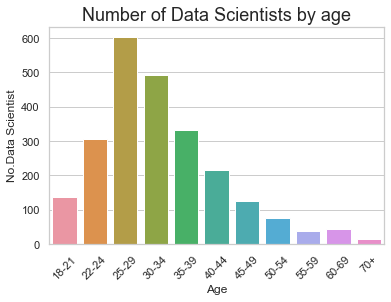

In [37]:
by_age = sns.countplot(x = 'age', data = dsc_df, order = sorted(dsc_df['age'].unique().tolist()))
by_age.set_xticklabels(by_age.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='center');
by_age.set_title('Number of Data Scientists by age', fontsize = 18)
by_age.set(xlabel="Age", ylabel="No.Data Scientist")

                      Country and Data Scientists 

In [38]:
by_country = dsc_df.groupby(by = 'country').size()      #Grouped data based on country
by_country = by_country.sort_values(ascending = False)  #sorting
by_country = pd.DataFrame(by_country).reset_index()     # new_index in order to make a country as column
by_country = by_country.rename(columns = {by_country.columns[1] : 'No.Data Scientists'}) #rename column [1]
by_country.head(10)

,country,No.Data Scientists
0,India,488
1,USA,360
2,Other,159
3,Brazil,117
4,UK,108
5,Russia,82
6,Japan,71
7,France,66
8,Germany,64
9,Nigeria,63


Initially , we can see that most of the participants are located in India followed by USA, while it is noteworthy that in the survey many participants live in country that has not been included in the survey.

To make it clearier let's visualize.

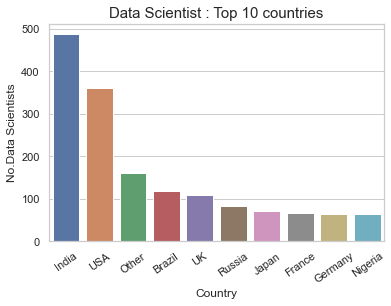

In [39]:
#Creating a barplot for top 10 countries
top_10_countries = sns.barplot(x = 'country', y = 'No.Data Scientists', data = by_country.head(10))
top_10_countries.set(xlabel = 'Country', ylabel = 'No.Data Scientists')
top_10_countries.set_title('Data Scientist : Top 10 countries', fontsize = 15)
plt.xticks(rotation = 35)
plt.show()

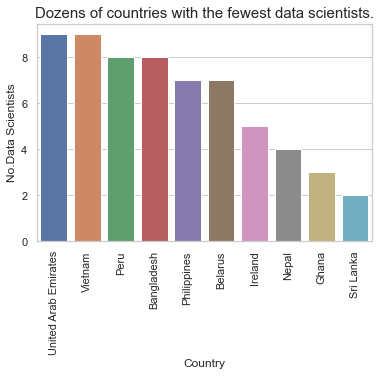

In [40]:
last_10_countries = sns.barplot(x = 'country', y = 'No.Data Scientists', data = by_country.tail(10))
last_10_countries.set(xlabel = 'Country', ylabel = 'No.Data Scientists')
last_10_countries.set_title('Dozens of countries with the fewest data scientists.', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

                            DATA SCIENCE BY CONTINENT
                          
                             DATA SCIENCE IN EUROPE

In [41]:
#Unique countries in subset
dsc_df.country.unique()

array(['USA', 'Germany', 'Russia', 'Indonesia', 'Ukraine', 'China',
       'India', 'Colombia', 'Canada', 'Egypt', 'Nigeria', 'Turkey',
       'Spain', 'Iran', 'Other', 'Romania', 'UK', 'Sweden', 'Netherlands',
       'France', 'Japan', 'South Africa', 'Poland', 'Mexico',
       'Korea, Republic of', 'Argentina', 'Brazil', 'Vietnam', 'Malaysia',
       'Switzerland', 'Australia', 'Bangladesh', 'Italy', 'Morocco',
       'Pakistan', 'Israel', 'Tunisia', 'Kenya', 'Chile', 'Ireland',
       'Belarus', 'Singapore', 'Saudi Arabia', 'Thailand', 'Taiwan',
       'Portugal', 'Belgium', 'Ghana', 'Greece', 'United Arab Emirates',
       'Nepal', 'Philippines', 'Peru', 'Sri Lanka'], dtype=object)

In [42]:
#Creating a list with European countries
european_countries = ['Germany', 'Russia', 'Ukraine',
                     'Turkey', 'Spain', 'Romania',
                     'UK', 'Sweden', 'Netherlands',
                     'France', 'Poland', 'Switzerland',
                      'Italy', 'Israel', 'Ireland',
                     'Belarus', 'Portugal', 'Belgium',
                     'Greece']

#Creating a subset based on European countries
data_science_in_europe = dsc_df[dsc_df['country'].isin(european_countries)].reset_index(drop = True)
data_science_in_europe.head(5)

,age,sex,country,education,role,prog_exp,annual_salary
0,35-39,Man,Germany,PHD,Data Scientist,5-10,70000-79999
1,30-34,Man,Russia,BSc,Data Scientist,<1,0-999
2,30-34,Man,Ukraine,MSc,Data Scientist,3-5,60000-69999
3,25-29,Woman,Germany,MSc,Data Scientist,3-5,50000-59999
4,18-21,Man,Turkey,BSc,Data Scientist,1-2,5000-7499


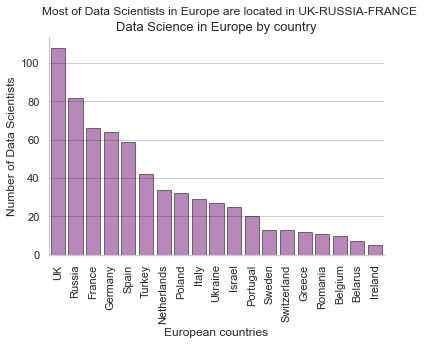

In [43]:
by_country_in_europe = sns.countplot( x = 'country', data = data_science_in_europe,
             order = data_science_in_europe['country'].value_counts().index, color = 'purple', edgecolor = 'black', alpha = 0.5)
by_country_in_europe.set_xticklabels(by_country_in_europe.get_xticklabels(),
                                    rotation = 90)
by_country_in_europe.set( xlabel = 'European countries', ylabel = 'Number of Data Scientists')
by_country_in_europe.set_title('Data Science in Europe by country', fontsize = 13)
by_country_in_europe.text(-0.9, 125, 'Most of Data Scientists in Europe are located in UK-RUSSIA-FRANCE')
sns.despine(right = True)

age
30-34    24.28
25-29    23.22
35-39    15.63
40-44     9.71
22-24     8.65
45-49     6.98
50-54     3.34
18-21     3.19
55-59     2.28
60-69     2.12
70+       0.61
Name: percentage, dtype: float64


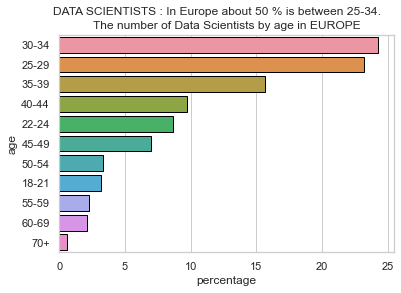

In [44]:
by_age_europe = pd.DataFrame(data_science_in_europe.groupby('age').size().sort_values(ascending = False))
by_age_europe = by_age_europe.rename(columns = {by_age_europe.columns[0] : 'Number of Data Scientists'})
by_age_europe['percentage'] = round(by_age_europe['Number of Data Scientists'] / sum(by_age_europe['Number of Data Scientists']) * 100, 2)
print(by_age_europe['percentage'])

#Plotting
sns.barplot( x = 'percentage', y = by_age_europe.index, 
            data = by_age_europe, edgecolor = 'black')
plt.title('The number of Data Scientists by age in EUROPE')
plt.text(-0.5, -1.5, 'DATA SCIENTISTS : In Europe about 50 % is between 25-34.')
plt.show()

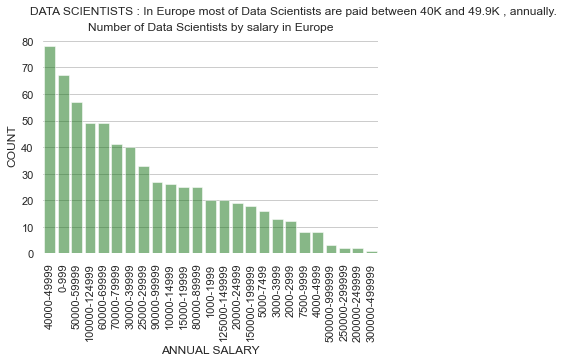

In [45]:
by_salary_in_europe = sns.countplot( x = 'annual_salary', data = data_science_in_europe,
             order = data_science_in_europe['annual_salary'].value_counts().index, color = 'green', 
                                    edgecolor = 'white', alpha = 0.5)
by_salary_in_europe.set_xticklabels(by_salary_in_europe.get_xticklabels(),
                                   rotation = 90)
by_salary_in_europe.set(xlabel = 'ANNUAL SALARY', ylabel = 'COUNT')
by_salary_in_europe.set_title('Number of Data Scientists by salary in Europe')
by_salary_in_europe.text(-1.5, 90, 'DATA SCIENTISTS : In Europe most of Data Scientists are paid between 40K and 49.9K , annually.')
sns.despine(left = True, bottom = True)

education
MSc      59.03
PHD      24.13
BSc      10.32
Other     6.53
Name: percentage, dtype: float64


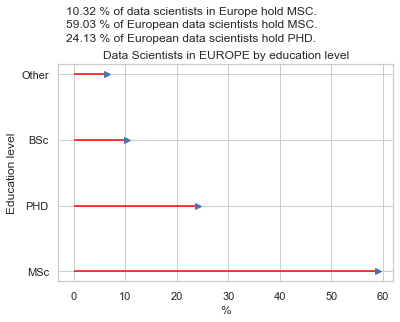

In [46]:
#DATA SCIENTISTS IN EUROPE BY EDUCATION

by_education_europe = pd.DataFrame(data_science_in_europe.groupby('education').size().sort_values(ascending = False))
by_education_europe = by_education_europe.rename(columns = {by_education_europe.columns[0] : 'Count'})
by_education_europe['percentage'] = round(by_education_europe['Count'] / sum(by_education_europe['Count']) *100, 2)
print(by_education_europe['percentage'])

#Plotting
# The horizontal plot is made using the hline function
plt.hlines(y = by_education_europe.index, xmin = 0, xmax = by_education_europe['percentage'], color='red')
plt.plot(by_education_europe['percentage'], by_education_europe.index, ">")
plt.title('Data Scientists in EUROPE by education level')
plt.text(-1.5, 3.9, '10.32 % of data scientists in Europe hold MSC.')
plt.text(-1.5, 3.7, '59.03 % of European data scientists hold MSC.')
plt.text(-1.5, 3.5, '24.13 % of European data scientists hold PHD.')
plt.ylabel('Education level')
plt.xlabel('%')
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


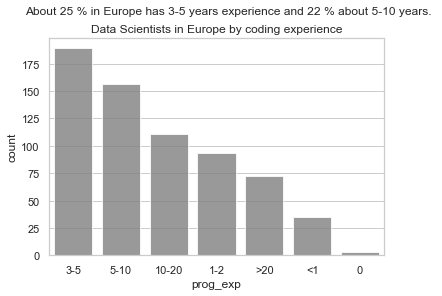

In [47]:
by_coding_experience = sns.countplot( x = 'prog_exp', data = data_science_in_europe, color = 'grey', 
                                     edgecolor = 'white', alpha = 0.8, order = data_science_in_europe['prog_exp'].value_counts().index)
by_coding_experience.set_title('Data Scientists in Europe by coding experience')
by_coding_experience.text(-1, 220, 'About 25 % in Europe has 3-5 years experience and 22 % about 5-10 years. ')
print(by_coding_experience)

                      DATA SCIENCE IN AFRICAN CONTINENT

In [48]:
#Let's create a list with African countries
african_countries = ['Egypt', 'Nigeria', 'South Africa', 'Morocco', 'Tunisia', 'Kenya', 'Ghana']
african_countries

['Egypt', 'Nigeria', 'South Africa', 'Morocco', 'Tunisia', 'Kenya', 'Ghana']

In [49]:
#Creating a data frame for data scientists in Africa
africa_continent_df = dsc_df[dsc_df['country'].isin(african_countries)].reset_index(drop = True)
africa_continent_df.shape #151 data scientists from African continent

(151, 7)

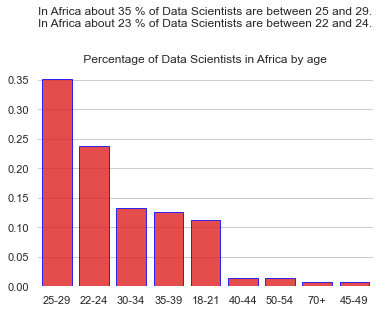

In [50]:
by_age_africa = africa_continent_df['age'].value_counts(normalize = True).sort_values(ascending = False)

by_age_africa_plot = sns.barplot( y = by_age_africa.values, x = by_age_africa.index, 
           data = africa_continent_df, color = 'red', edgecolor = 'blue', alpha = 0.8)

by_age_africa_plot.set_title(' Percentage of Data Scientists in Africa by age ')
by_age_africa_plot.text(-0.5, 0.46, "In Africa about 35 % of Data Scientists are between 25 and 29.")
by_age_africa_plot.text(-0.5, 0.44, "In Africa about 23 % of Data Scientists are between 22 and 24.")
sns.despine(bottom = True, left = True)

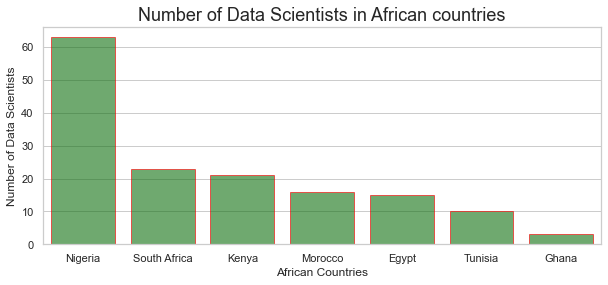

In [51]:
by_country_africa = africa_continent_df['country'].value_counts().sort_values(ascending = False)

#Plotting
plt.figure( figsize = (10, 4))
by_country_africa_plot = sns.countplot( x = 'country', data = africa_continent_df,
             order = by_country_africa.index, color = 'green', edgecolor = 'red', alpha = 0.6)
by_country_africa_plot.set_title('Number of Data Scientists in African countries', fontsize = 18)
by_country_africa_plot.set(xlabel = 'African Countries', ylabel = 'Number of Data Scientists')   
plt.show()

sex         Man  Other  Woman
education                    
BSc        59.0    1.0   11.0
MSc        42.0    1.0   12.0
Other      10.0    0.0    2.0
PHD         9.0    0.0    4.0


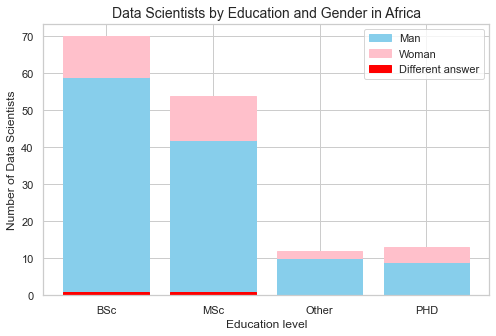

In [52]:
by_education_sex_africa = africa_continent_df.groupby(['education', 'sex']).size().unstack().fillna(0)
print(by_education_sex_africa)

fig, ax = plt.subplots(figsize = (8, 5))
# First plot the 'Man' bars for education level
ax.bar(by_education_sex_africa.index, by_education_sex_africa['Man'], label = 'Man',
       color = 'skyblue', edgecolor = 'skyblue', alpha = 1)

# Then plot the 'Woman' bars 
ax.bar(by_education_sex_africa.index, by_education_sex_africa['Woman'],
       bottom = by_education_sex_africa['Man'], label = 'Woman', 
       color = 'pink', edgecolor = 'pink', alpha = 1)

#Also plot ;Others'
ax.bar(by_education_sex_africa.index, by_education_sex_africa['Other'],
        label = 'Different answer', 
       color = 'red', edgecolor = 'red', alpha = 1)

ax.set_title('Data Scientists by Education and Gender in Africa', fontsize = 14) 
ax.set_xlabel('Education level')
ax.set_ylabel('Number of Data Scientists')
ax.legend()
plt.show()


#How can I draw the background?

As we can see the number of participating data scientists from the continent of Africa is largely made up of the country of Nigeria. South Africa follows , but the number of Nigerians is almost three times that of South Africa . 

Also, male data scientists in Africa , i.e. 59 out of 120 hold BSC , 42 out of 120 MSc holders , PhD holders 9 out of 120 while lower education is 10 out of 120.

Also most female data scientists in Africa hold MSC and BSC, while 4 out of 29 hold PhDs.

                            DATA SCIENCE IN ASIA

In [53]:
#Creating a list of Asian Countries
asian_countries = ['Indonesia', 'India', 'China', 'Iran', 'Japan', 
                   'Korea, Republic of', 'Vietnam', 'Malaysia', 'Bangladesh',
                    'Pakistan', 'Singapore', 'Saudi Arabia', 'Thailand', 'Taiwan',
                   'United Arab Emirates', 'Nepal', 'Philippines', 'Sri Lanka']

data_science_in_asia = dsc_df[dsc_df['country'].isin(asian_countries)].reset_index(drop = True)
data_science_in_asia.head(5)

,age,sex,country,education,role,prog_exp,annual_salary
0,22-24,Man,Indonesia,MSc,Data Scientist,3-5,4000-4999
1,18-21,Woman,Indonesia,BSc,Data Scientist,<1,0-999
2,25-29,Man,China,Other,Data Scientist,<1,0-999
3,18-21,Man,India,BSc,Data Scientist,<1,0-999
4,25-29,Man,Iran,MSc,Data Scientist,3-5,2000-2999


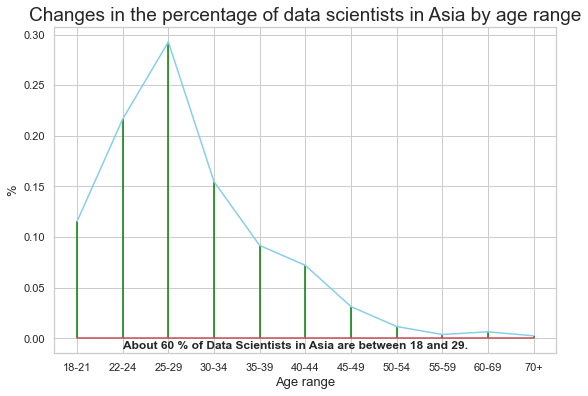

In [54]:
#Creating a Serie for Data Scientists in Asia by age.
by_age_in_asia = data_science_in_asia['age'].value_counts(normalize = True).sort_index()

#Creating a plt based on lolliplot techiques in order to show the variation between age ranges.
#plt.stem?
plt.subplots(figsize = (9, 6))
plt.stem( by_age_in_asia.index,  by_age_in_asia.values, 
        markerfmt = 'skyblue', linefmt = 'green')

#Labels
plt.title('Changes in the percentage of data scientists in Asia by age range', fontsize = 19)
plt.xlabel( xlabel = 'Age range', fontsize = 13)
plt.ylabel(ylabel = '%', fontsize = 13)
plt.text(1, -0.01, 'About 60 % of Data Scientists in Asia are between 18 and 29.', fontweight = 'bold')
plt.show()


In [55]:
#Data science in Asia by programming experience and gender
by_prog_exp_and_gender_asia = data_science_in_asia.groupby(['sex', 'prog_exp']).size().unstack().fillna(0).T
by_prog_exp_and_gender_asia 




sex,Man,Other,Woman
prog_exp,,,
0,10.0,0.0,5.0
1-2,147.0,1.0,29.0
10-20,58.0,1.0,5.0
3-5,208.0,0.0,33.0
5-10,126.0,2.0,21.0
<1,75.0,1.0,17.0
>20,22.0,0.0,1.0


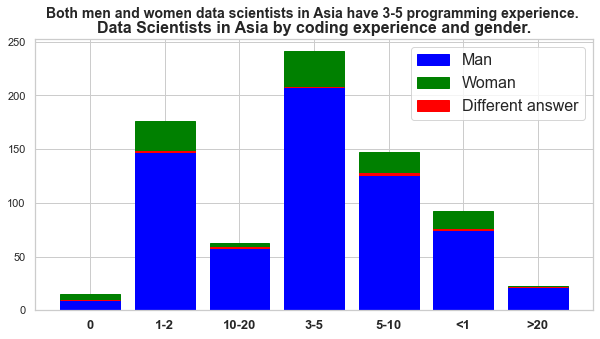

In [56]:
#Plotting
plt.subplots(figsize = (10, 5))

#Creating bars for ['Man'] in Asia in bottom
plt.bar(by_prog_exp_and_gender_asia.index, by_prog_exp_and_gender_asia['Man'], label = 'Man', 
       color = 'blue', edgecolor = 'blue')
#Creating bars for ['Woman'] in Asia with ['Man'] in  bottom
plt.bar(by_prog_exp_and_gender_asia.index, by_prog_exp_and_gender_asia['Woman'], label = 'Woman', 
       bottom = by_prog_exp_and_gender_asia['Man'], color = 'green', edgecolor = 'green')
#Creating bars for Different answer
plt.bar(by_prog_exp_and_gender_asia.index,
        by_prog_exp_and_gender_asia['Other'], label = 'Different answer',
       color = 'red', edgecolor = 'red', alpha = 1, bottom = by_prog_exp_and_gender_asia['Man'])
#Labels
plt.title('Data Scientists in Asia by coding experience and gender.', fontsize = 16, fontweight = 'bold')
plt.text(-0.6, 272, 'Both men and women data scientists in Asia have 3-5 programming experience.',
        fontsize = 14, fontweight = 'bold')
plt.xticks( x = 'Programming experience', fontsize = 13, fontweight = 'bold')
plt.legend(fontsize = 16)
plt.show()


                             DATA SCIENCE BY AMERICAN COUNTRIES

In [57]:
#Creating a list for American countries
america_countries = ['USA', 'Colombia', 'Canada', 
                    'Mexico', 'Argentina', 'Brazil',
                    'Chile', 'Peru']

#Subset based on American countries
data_science_in_america = dsc_df[dsc_df['country'].isin(america_countries)].reset_index(drop = True)
data_science_in_america.head(3)

,age,sex,country,education,role,prog_exp,annual_salary
0,30-34,Man,USA,MSc,Data Scientist,5-10,125000-149999
1,55-59,Man,Colombia,MSc,Data Scientist,10-20,40000-49999
2,35-39,Man,Canada,MSc,Data Scientist,10-20,80000-89999


Text(-0.5, 360, '')

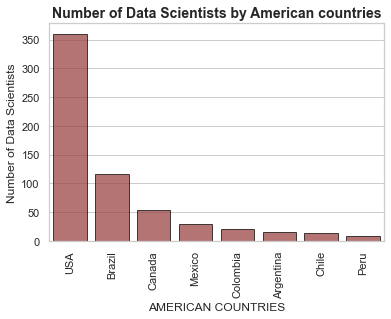

In [58]:
by_country_in_america = sns.countplot( x = 'country', data = data_science_in_america,
             order = data_science_in_america['country'].value_counts().index,
             color = 'brown', edgecolor = 'black', alpha = 0.7)
by_country_in_america.set_title('Number of Data Scientists by American countries',
                               fontsize = 14, fontweight = 'bold')
by_country_in_america.set_xticklabels(by_country_in_america.get_xticklabels(),
                                      rotation = 90)
by_country_in_america.set(xlabel = 'AMERICAN COUNTRIES', 
                         ylabel = 'Number of Data Scientists')
by_country_in_america.text(-0.5, 360, '')

                  
                 A QUICK LOOK ABOUT EDUCATION LEVEL OF DATA SCIENTISTS 
                                 IN AUSTRALIA 

In [59]:
#Creating subset for Australia continent 
data_science_in_australia = dsc_df[dsc_df['country'] == 'Australia'].reset_index( drop = True)

AxesSubplot(0.125,0.125;0.775x0.755)


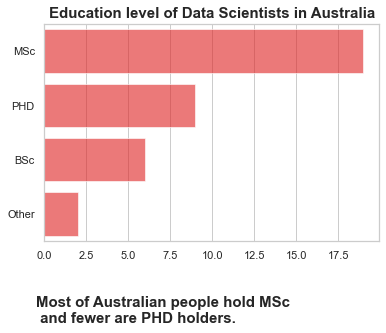

In [60]:
by_education_in_australia_plot = sns.barplot( x = data_science_in_australia['education'].value_counts().values,
            y = data_science_in_australia['education'].value_counts().index,
            data = data_science_in_australia, 
           color = 'red', edgecolor = 'white', alpha = 0.6)

by_education_in_australia_plot.set_title('Education level of Data Scientists in Australia',
                                        fontsize = 15, fontweight = 'bold')
by_education_in_australia_plot.text(-0.5, 5, 'Most of Australian people hold MSc \n and fewer are PHD holders.',
                                   fontsize = 15, fontweight = 'bold')
print(by_education_in_australia_plot)

                             AN OVERALL VALUATION

In [61]:
#Creating a data frame in order to see the number of data scientists based on education level
df_education_level = pd.DataFrame(dsc_df.groupby(by = 'education').size().sort_values(ascending = False))
df_education_level = df_education_level.rename(columns = {df_education_level.columns[0] : 'No.Data Scientists'})
df_education_level['percentage'] = round(df_education_level['No.Data Scientists'] / len(dsc_df) * 100, 2)
df_education_level

,No.Data Scientists,percentage
education,,
MSc,1241,52.03
BSc,552,23.14
PHD,431,18.07
Other,161,6.75


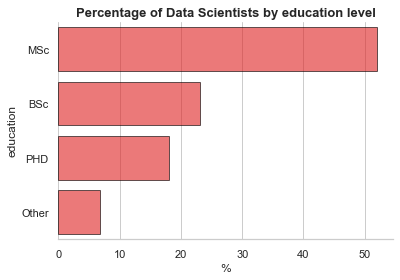

In [62]:
sns.set_color_codes("pastel")
by_education_plot = sns.barplot(x = 'percentage', y = df_education_level.index, data = df_education_level, color="red", edgecolor = 'black',
                               alpha = 0.6)
by_education_plot.set(xlabel = '%')
by_education_plot.set_title('Percentage of Data Scientists by education level', fontsize = 13,
                           fontweight = 'bold')
sns.despine(left = True, bottom = False)

A)The above chart presents the distribution of the variable described above.Most of the participating data scientists are people with Master's degree - about 52 %. Slightly fewer people indicate a bachelor's degree - about 23 %. Therefore 85 percent of data scientists in this dataset have at least 3+ years of study.
Additionally, 18 per cent hold a PhD or are very close to being acquired, while about 6 %  of the total are either vocational education graduates or do not prefer to answer.

In [63]:
#Creating a dataframe in order to explore the Data scientists based on education level and gender
dsc_by_gender_education = dsc_df.groupby(['education', 'sex'])['role'].size().unstack().fillna(0)
dsc_by_gender_education

sex,Man,Other,Woman
education,,,
BSc,468,10,74
MSc,1039,14,188
Other,135,4,22
PHD,349,8,74


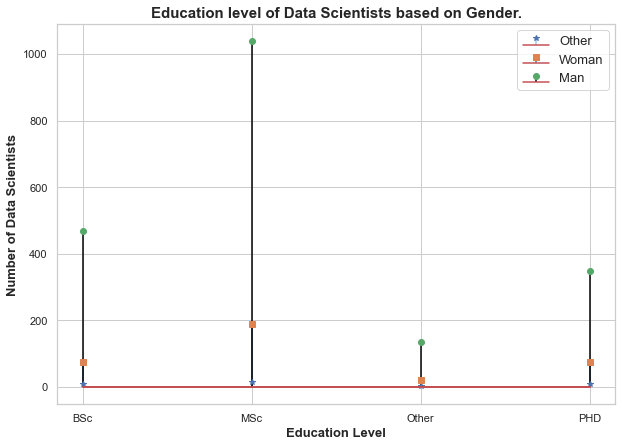

In [64]:
plt.subplots( figsize = (10, 7))

#Lollipop lines for 'Other' answers "*"
plt.stem(dsc_by_gender_education.index, dsc_by_gender_education['Other'], label = 'Other', 
        markerfmt = '*', linefmt = 'b')
#Lollipop lines for Women "s"
plt.stem(dsc_by_gender_education.index, dsc_by_gender_education['Woman'], label = 'Woman',
        markerfmt = 's')

#Lollipop lines for Men "o"
plt.stem(dsc_by_gender_education.index, dsc_by_gender_education['Man'], label = 'Man', 
        markerfmt = 'o', linefmt = 'black')

#Labels
plt.legend(fontsize = 13)
plt.title('Education level of Data Scientists based on Gender.', 
             fontsize = 15, fontweight = 'bold')
plt.xlabel( xlabel = 'Education Level', fontsize = 13, fontweight = 'bold')
plt.ylabel(ylabel = 'Number of Data Scientists', fontsize = 13, fontweight = 'bold')
plt.show()

We also note that of all men, the vast majority , i.e. 1856 out of 1991 have completed studies lasting at least 3 years , while combined with the fact that women, i.e. 336 out of 358 have the same educational background shows us that the technical background needed by a data scientist is quite intense.

In addition, in the case of male scientists, 17.5 per cent hold a PhD , while almost half hold a master's degree , while 23 per cent have an undergraduate degree.

In the case of women we see that 20 per cent of data scientists have an undergraduate degree, while the same proportion have a PhD and almost 50 per cent hold a master's degree.

Personally what I understand - judging from the level of education - is that to be a data scientist at any level - whether you are a woman or a man - you need to have postgraduate studies and above. I find it perfectly reasonable because personally around the world I have not seen an undergraduate department focusing on data science, which is a combination of things.

                                 NEXT CHAPTER
               -----DATA SCIENTIST'S ROLE AND PROGRAMMING EXPERIENCE----

In [65]:
#Creating a data frame grouped by prog experience
prog_background = pd.DataFrame(dsc_df.groupby('prog_exp').size())
prog_background.columns = ['Count']

#Sorting Frame by Number of Data Scientists
prog_background = prog_background.sort_values(by = 'Count', ascending = False)
prog_background = prog_background.reset_index(drop = False)
prog_background

,prog_exp,Count
0,3-5,667
1,5-10,546
2,1-2,391
3,10-20,337
4,<1,208
5,>20,208
6,0,28


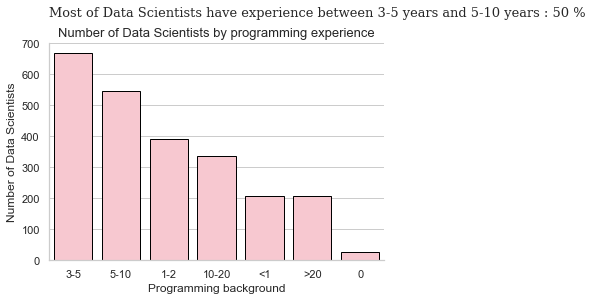

In [66]:
#Creating a barplot 
by_programming_background_plot = sns.barplot(x = 'prog_exp', y = 'Count', data = prog_background,
                              color = 'pink', edgecolor = 'black', alpha = 1)
by_programming_background_plot.set_xticklabels(by_programming_background_plot.get_xticklabels(),
                      rotation = 0,
                     horizontalalignment='center')
by_programming_background_plot.set_title('Number of Data Scientists by programming experience', fontsize = 13)
by_programming_background_plot.text(-0.5, 785, 'Most of Data Scientists have experience between 3-5 years and 5-10 years : 50 %',
                                    fontsize = 13, fontweight = 'light',  fontfamily = 'serif')
by_programming_background_plot.set( xlabel = 'Programming background', ylabel = 'Number of Data Scientists')

sns.despine(bottom = False)

At first glance it is obvious that most participating data scientists , i.e. about 28 % have a programming background of 3-5 years , while 5-10 years has about 22 % , i.e. cumulatively about 50 per cent have a background of 3 - 10 years. It is noteworthy that 1-2 years has 16 % while 10 - 20 years has 14 % .  It also appears that under 1 year and over 20 years it has 8,7 % , respectively , while code has never written by 1,2 % data scientists(obvious).

In [67]:
df_annual_salary = pd.DataFrame(dsc_df['annual_salary'].value_counts().reset_index(drop = False))
df_annual_salary.columns = ['Annual_salary', 'Count']
df_annual_salary = df_annual_salary.sort_values(by = 'Count', ascending = False)
df_annual_salary['Percentage'] = round(df_annual_salary['Count'] / sum(df_annual_salary['Count']) * 100, 2)
df_annual_salary.head(10)

,Annual_salary,Count,Percentage
0,0-999,445,18.66
1,100000-124999,165,6.92
2,10000-14999,137,5.74
3,40000-49999,133,5.58
4,30000-39999,118,4.95
5,150000-199999,112,4.70
6,125000-149999,109,4.57
7,50000-59999,104,4.36
8,1000-1999,103,4.32
9,70000-79999,100,4.19


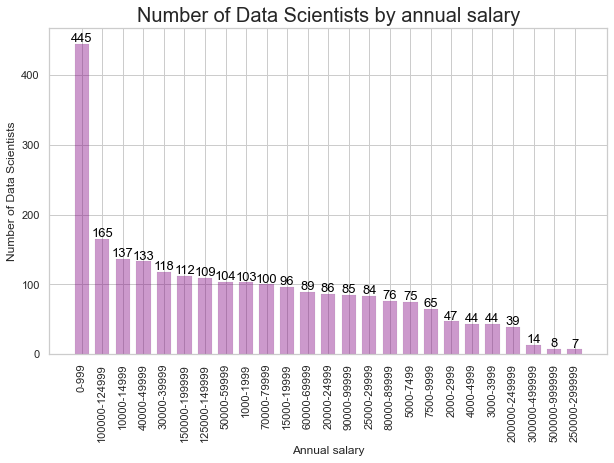

In [70]:
fig4, ax4 = plt.subplots(1,1, figsize=(10, 6))
data_salary = dsc_df['annual_salary'].value_counts().sort_values(ascending = False)
ax4.bar(data_salary.index, data_salary, width = 0.7,
      edgecolor = 'black', color = 'purple', linewidth = 0.1, alpha = 0.4)

for i in data_salary.index:
    ax4.annotate(f"{data_salary[i]}",
                xy=(i, data_salary[i] + 7),
                   va = 'center', ha='center',fontweight='light', 
                   color='black', fontsize = 13)
ax4.set_title('Number of Data Scientists by annual salary', fontsize = 20)
ax4.set(ylabel = 'Number of Data Scientists', xlabel = 'Annual salary')
plt.xticks(rotation = 90)
plt.show()

1) Most data scientists are under 34, while peak age is the range of 25-29 years.

2) The top 5 countries representing the role of data scientist are India, the United States of America, from countries not included in the survey,(Others), Brazil and the UK.Orangutans appear to be Belarus, Ireland, Nepal, Ghana and Sri Lanka.

3) The number of European countries is 19. The UK appears to be a leading country among European countries, while the European five are complemented by Russia, France, Germany and Spain.Greece , Romania , Belgium and Belarus seem to explain a small part of the data scientists , being in the last five of Europe.

4) The role of the data scientist is explained less, cumulatively, by the African continent. However, among them Nigeria appears to be the main representative , with almost three times the number of the second African country in South Africa.The role of the data scientist is explained less, cumulatively, by the African continent. However, among them Nigeria appears to be the main representative , with almost three times the number of the second African country in South Africa. At the same time, Egypt, Tunisia and Ghana have few representatives of data scientists, being the countries of Africa with the least participation.

5) As far as Asian countries are concerned, India seems to represent not only , globally , but also among major Asian countries such as Japan and China , the largest percentage of data scientists.In fact, the number of data scientists in India is almost 7 times higher than the second Asian country - Japan.At the same time , the Country of Australia has a lower participation rate , about 36 entries of data scientists.

6) Among the countries of the America , as we observed data scientists come overwhelmingly from the United States of America , having almost 3 times the number of participants from the second Brazil. Canada, Mexico and Colombia lock down the first 5th of the American Continent.

7) When it comes to the gender of data scientists around the world - 83 per cent are made up of men - 15 per cent are female - while a minimum percentage of data scientists have not given a specific answer.


8) Noteworthy is that the largest percentage of men are from 25-29 and 30-34. Nearly half of male data scientists are aged 25-34. Exactly the same pattern is observed in the case of women almost half of the women in data science belong to the same range, while in cases more than 50 % are under 34 years of age.

9) Subsequently , the largest number of male data scientists belong to the country of India . In fact, in India, women represent the largest percentage of data scientists among women worldwide. However, the number of men is almost three times that of women in India.In second place among male data scientists, the United States of America has almost 1.5 times fewer representatives than the first India , while female data scientists are in second place among women , slightly fewer than India.Third place is men in the 'Others' category, with almost four times fewer scientists given than men in India, while female data scientists from other countries are in fourth place, behind the third UK.Fourth place among male data scientists belongs to Brazil having almost 4 times fewer male participants than India, while female data scientists from Brazil are in 5th place behind women in the UK and others.The UK is ranked fifth among male data scientists , while women in the same country are ranked third among female data scientists.

10) As far as the educational level of data scientists is concerned, we note that almost half have a master's degree, i.e. about 50 per cent have a master's degree. Then , about 23 per cent have only an undergraduate degree , while about 20 per cent hold a PhD.

11) It is noteworthy that almost 50 % of male data scientists have a master's degree. Among female data scientists, half of women hold a master's degree, while exactly the same percentage of women have an undergraduate degree or hold a Doctoral degree.

12) Αdditionaly,  it is obvious that most participating data scientists , i.e. about 28 % have a programming background of 3-5 years , while 5-10 years has about 22 % , i.e. cumulatively about 50 per cent have a background of 3 - 10 years. It is noteworthy that 1-2 years has 16 % while 10 - 20 years has 14 % .  It also appears that under 1 year and over 20 years it has 8,7 % , respectively , while code has never written by 1,2 % data scientists(obvious).

13) Data scientists Annual salary:

          We can extract these interesting things :

1.Most data scientists - i.e. 18.6 % have an annual income of USD 0 -999 - which is extremely worrying because it seems that a large proportion of respondents may have answered for monthly income.

2.In second place we note that 7 per cent receive 100K - 124.49K , while about 6 per cent from 10K - 14.9K.

3.The assumption that those who have answered that they receive annually from 0 - 999 , could be added to the range 100K - 149.49K , shows us that more than 20 percent , i.e. 1/5 of data scientists , possibly receives from 100Κ - 149.49 K. 

4.In addition, we note that cumulatively about 1.5 per cent receive more than 250K a year.

5.In conclusion, what can be said is that it also depends on the country, because wages vary from country to country.